In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')



/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_20670/1077967570.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


In [3]:
data.head
data.shape
data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'First Harmful Event',
       'Second Harmful Event', 'Junction', 'Intersection Type',
       'Road Alignment', 'Road Condition', 'Road Division', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

In [5]:
df.shape
df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type',
       'Lane Direction', 'Lane Type', 'Number of Lanes', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Collision Type', 'Related Non-Motorist', 'At Fault',
       'First Harmful Event', 'Second Harmful Event', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df.head
df.describe()

,Latitude,Longitude
count,101276.000000,101276.000000
mean,39.084404,-77.114360
std,0.072776,0.099519
min,37.720000,-79.486000
25%,39.025901,-77.191810
50%,39.076073,-77.107618
75%,39.140797,-77.040599
max,39.990414,-75.527708


In [7]:
df = df.dropna(axis=0)

In [8]:
df.shape

(91, 21)

In [9]:
df.describe()
df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type',
       'Lane Direction', 'Lane Type', 'Number of Lanes', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Collision Type', 'Related Non-Motorist', 'At Fault',
       'First Harmful Event', 'Second Harmful Event', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_20670/3598701326.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


<Axes: xlabel='Year'>

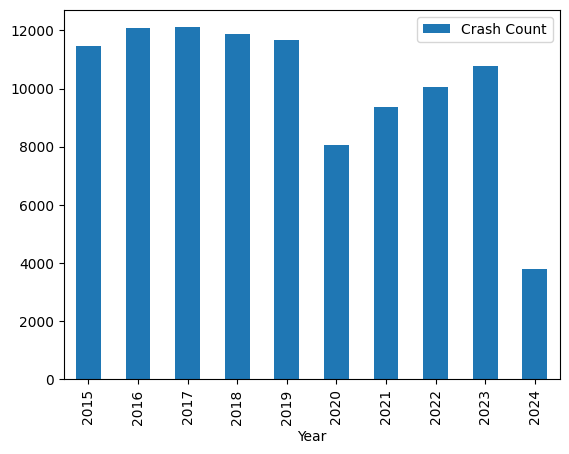

In [10]:
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
df = data

# création d'un nouveau jeu de données avec la colonne date qui regroupe les années de Crash Date/Time et qui additionne le nombre de crash par année
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df_yearly_crashes = df.groupby('Year').size().reset_index(name='Crash Count')
df_yearly_crashes.head()

#nombre totale d'accidents par année
df_yearly_crashes.plot(x='Year', y='Crash Count', kind='bar')


<Axes: ylabel='count'>

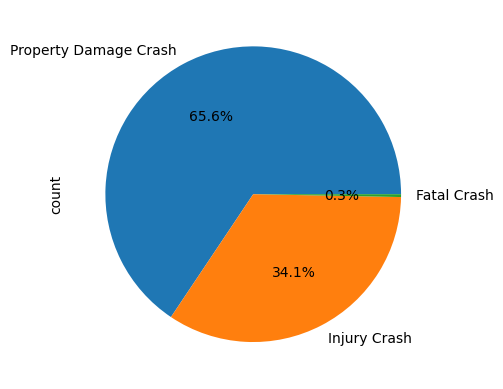

In [11]:
#Pourcentage de chaque type de crash
df['ACRS Report Type'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Hour'>

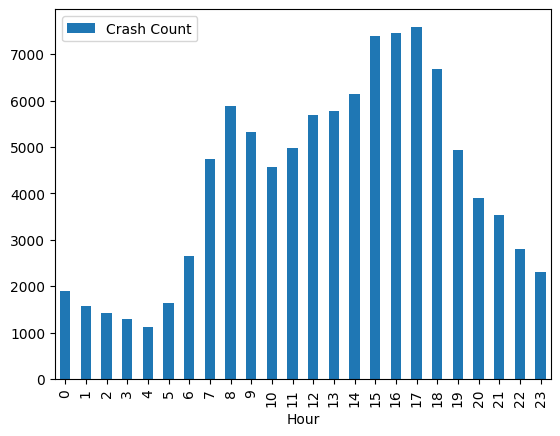

In [12]:
#Histogramme du nombre de crash par heure et par année

df['Hour'] = pd.to_datetime(df['Crash Date/Time']).dt.hour
df_hourly_crashes = df.groupby('Hour').size().reset_index(name='Crash Count')
df_hourly_crashes.plot(x='Hour', y='Crash Count', kind='bar')



<Axes: xlabel='Month'>

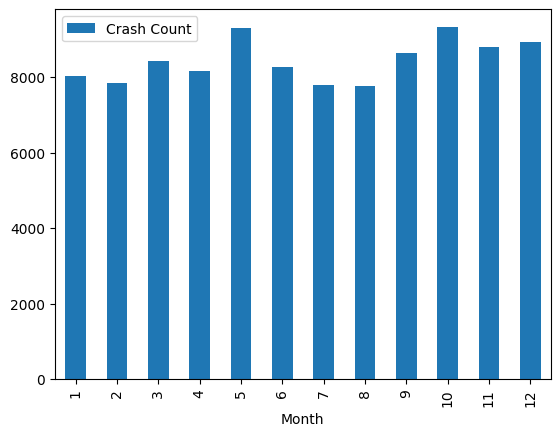

In [13]:
#Histogramme du nombre de crash par mois et par année
df['Month'] = pd.to_datetime(df['Crash Date/Time']).dt.month
df_monthly_crashes = df.groupby('Month').size().reset_index(name='Crash Count')
df_monthly_crashes.plot(x='Month', y='Crash Count', kind='bar')


In [14]:

data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

df.head()


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_20670/3750903340.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,Weather,Surface Condition,Light,...,Driver Substance Abuse,Non-Motorist Substance Abuse,Collision Type,Related Non-Motorist,At Fault,First Harmful Event,Second Harmful Event,Latitude,Longitude,Location
0,Injury Crash,03/04/2019 08:41:00 AM,No,Maryland (State),West,NaN,2,CLOUDY,DRY,DAYLIGHT,...,NONE DETECTED,NaN,SAME DIR REAR END,NaN,DRIVER,OTHER VEHICLE,NaN,39.113113,-77.057592,"(39.11311333, -77.05759167)"
1,Property Damage Crash,06/04/2016 07:14:00 PM,Yes,County,East,NaN,1,CLEAR,DRY,DAYLIGHT,...,UNKNOWN,NaN,OTHER,NaN,DRIVER,PARKED VEHICLE,OTHER VEHICLE,38.982443,-77.079235,"(38.98244333, -77.079235)"
2,Property Damage Crash,08/18/2015 11:00:00 PM,No,County,South,NaN,2,CLEAR,DRY,DARK LIGHTS ON,...,NONE DETECTED,NaN,OPPOSITE DIRECTION SIDESWIPE,NaN,UNKNOWN,PARKED VEHICLE,NaN,39.189845,-77.230325,"(39.189845, -77.230325)"
3,Injury Crash,08/24/2023 07:46:00 AM,No,Maryland (State),West,NaN,4,CLOUDY,DRY,DAYLIGHT,...,NONE DETECTED,NaN,SINGLE VEHICLE,NaN,DRIVER,NaN,NaN,39.041698,-77.050125,"(39.04169833, -77.050125)"
4,Property Damage Crash,08/12/2023 04:28:00 PM,Yes,NaN,South,NaN,3,NaN,DRY,NaN,...,NaN,NaN,SAME DIRECTION SIDESWIPE,NaN,DRIVER,OTHER VEHICLE,OTHER VEHICLE,39.084720,-77.148200,"(39.08472, -77.1482)"


In [15]:
#création d'une map avec les coordonnées des accidents et leur type de collision
import folium
from folium import plugins

#mise sur la map des points de coordonnées des accidents
map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)


for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)
    

map

In [16]:
#création d'un dataframe avec les coordonnées des accidents et leur type de collision sur l'année 2019 uniquement
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df_2019 = df[df['Year'] == 2019]
#création d'un dataframe comprenant que les accidents de type fatal crash sur l'année 2019
#df_fatal_crash_2019 = df_2019[df_2019['ACRS Report Type'] == 'Fatal Crash']

map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

for i in range(0, min(1000, len(df_2019))):
    if i >= len(df_2019):
        break
    folium.Marker([df_2019.iloc[i]['Latitude'], df_2019.iloc[i]['Longitude']], popup=df_2019.iloc[i]['Collision Type']).add_to(map)

    
map


#affichadu dataframe avec les coordonnées des accidents et leur type de collision sur l'année 2019 uniquement
df_2019.head()
#df_2019.shape


#création d'un dataframe avec les coordonnées des accidents et leur type de collision sur l'année 2019 uniqueme

/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_20670/1668008634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year


,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,Weather,Surface Condition,Light,...,Non-Motorist Substance Abuse,Collision Type,Related Non-Motorist,At Fault,First Harmful Event,Second Harmful Event,Latitude,Longitude,Location,Year
0,Injury Crash,03/04/2019 08:41:00 AM,No,Maryland (State),West,NaN,2,CLOUDY,DRY,DAYLIGHT,...,NaN,SAME DIR REAR END,NaN,DRIVER,OTHER VEHICLE,NaN,39.113113,-77.057592,"(39.11311333, -77.05759167)",2019
18,Property Damage Crash,05/13/2019 12:20:00 PM,No,Maryland (State),North,NaN,2,RAINING,WET,DAYLIGHT,...,NaN,SAME DIR REAR END,NaN,DRIVER,OTHER VEHICLE,OTHER VEHICLE,39.167610,-77.268007,"(39.16761, -77.26800667)",2019
28,Injury Crash,10/22/2019 03:30:00 PM,No,County,West,NaN,2,RAINING,WET,DAYLIGHT,...,NaN,SAME DIR REAR END,NaN,DRIVER,OTHER VEHICLE,NaN,39.001425,-77.127888,"(39.001425, -77.12788833)",2019
36,Property Damage Crash,01/02/2019 02:06:00 PM,Yes,County,North,NaN,2,CLEAR,DRY,DAYLIGHT,...,NaN,SINGLE VEHICLE,NaN,DRIVER,FIXED OBJECT,NaN,39.267193,-77.225707,"(39.26719333, -77.22570667)",2019
37,Injury Crash,11/24/2019 10:49:00 AM,No,County,South,NaN,1,RAINING,WET,DAYLIGHT,...,NaN,SINGLE VEHICLE,NaN,DRIVER,FIXED OBJECT,NaN,39.187688,-77.229653,"(39.18768833, -77.22965333)",2019


In [17]:
# map des accident par type de collision et sur l'année 2019
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2019]



map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)

map

In [18]:
#création d'une heatmap avec les coordonnées des accidents
from folium.plugins import HeatMap

map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

heat_df = df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map)

map

In [19]:
#création d'une heatmap avec les coordonnées des accidents sur l'année 2019 uniquement
map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

heat_df = df_2019[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map)

map


In [20]:
#récupération des données du CSV
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')

#création d'un dataframe avec les colonnes qui nous intéressent
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]


#création d'un jeux de données sur l'année 2020 uniquement


df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2018]

df.head()
df.shape


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_20670/3498950008.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_20670/3498950008.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year


(11869, 22)

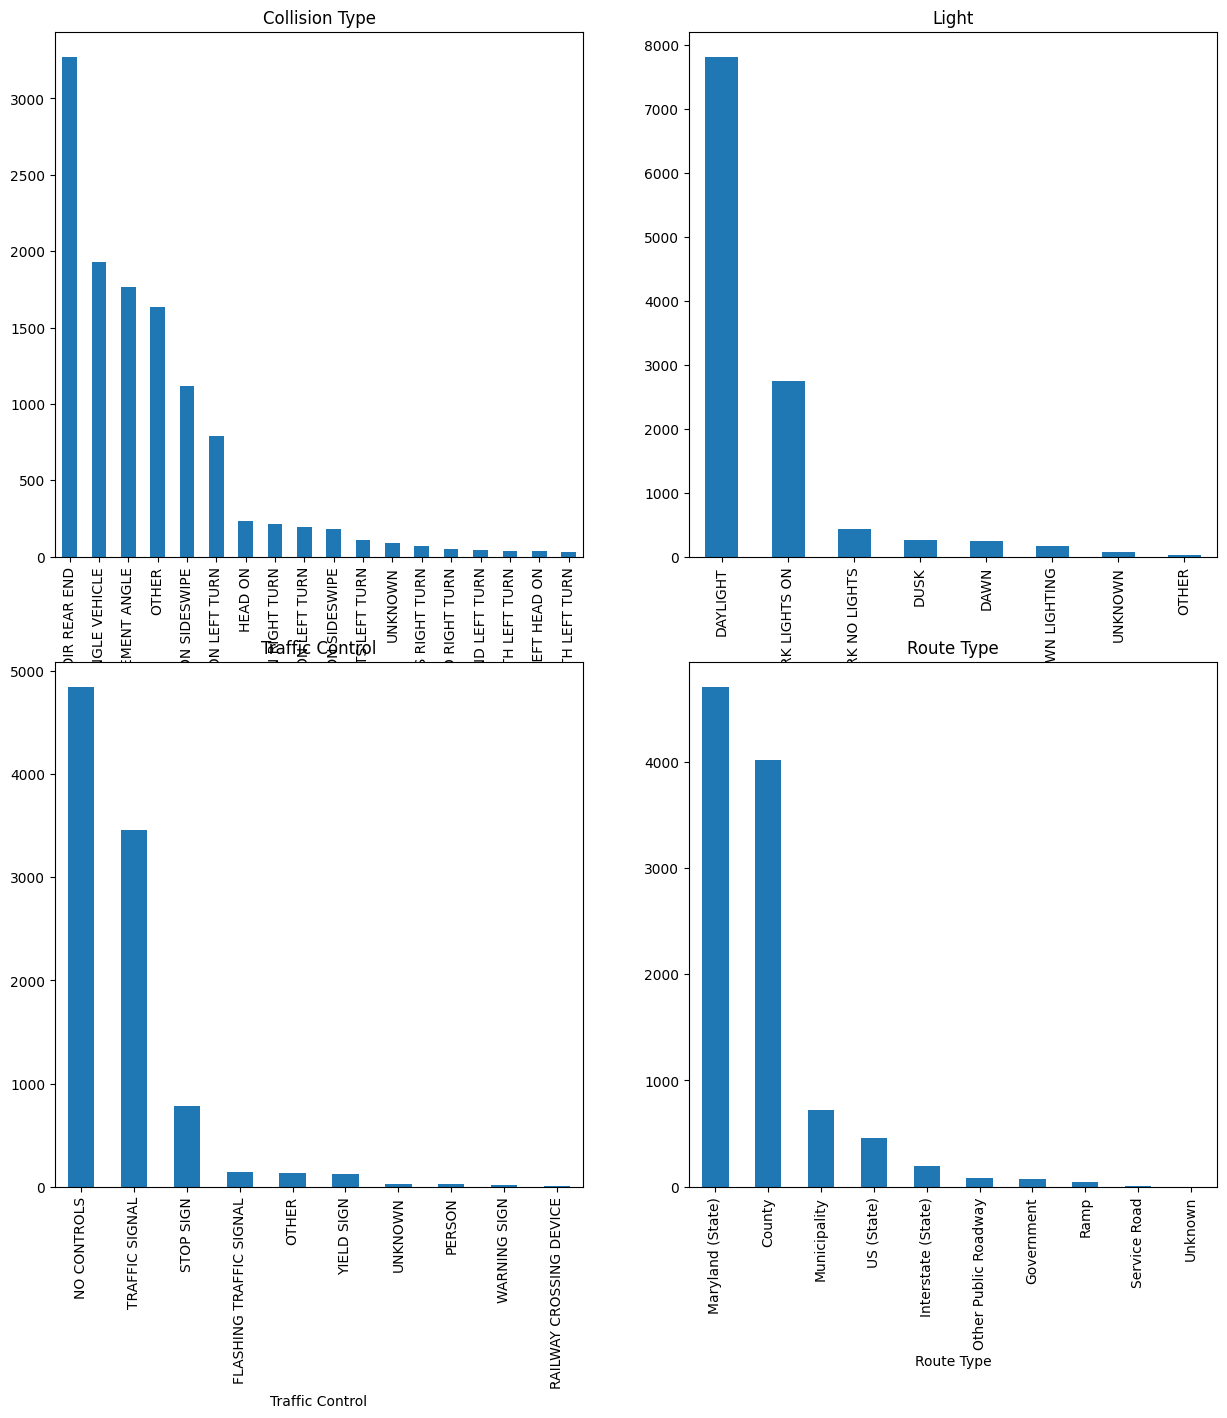

In [21]:
#création d'un graphique de 4 figures différentes avec les accidents par type de collision, par type de lumière, par type de trafic et par type de route
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

df['Collision Type'].value_counts().plot(kind='bar', ax=axs[0, 0], title='Collision Type')
df['Light'].value_counts().plot(kind='bar', ax=axs[0, 1], title='Light')
df['Traffic Control'].value_counts().plot(kind='bar', ax=axs[1, 0], title='Traffic Control')
df['Route Type'].value_counts().plot(kind='bar', ax=axs[1, 1], title='Route Type')

plt.show()
